<a href="https://colab.research.google.com/github/jmorwood10/PizzaBoys/blob/master/F20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets Discussion and Reasons to choose this dataset

FILL HERE...

## Setup

In [117]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [118]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [119]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import requests
import io


In [120]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

In [121]:
raw_data_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/Airbnb_Open_Data.csv"
def load_bnb_data(url=raw_data_url):
  # download the csv file from github
  download = requests.get(url).content

  # read the downloaded content and put into dataframe
  df = pd.read_csv(io.StringIO(download.decode("utf-8")),index_col=0,infer_datetime_format=True,dayfirst=False,dtype={'id':'int','Construction year':'float','NAME':'string','host id':'int','host_identity_verified':'string' ,'host name':'string','neighbourhood group':'string','neighbourhood':'string','lat':'float','long':'float','country':'string','country code':'string', 	'...':'string','service fee':'string','minimum nights':'float','number of reviews':'float', 'last review':'object','reviews per month':'float','review rate number':'float','calculated host listings count':'float','availability 365':'float','house_rules':'string','license':'string'
})
  return df

In [122]:
bnb_data = load_bnb_data()

In [123]:
#Filters the bnb df to only contain values that makes sense in the context of a year such as availability and minimum nights as neither can go above 365 or below 0
bnb_data=bnb_data[(bnb_data['availability 365']>=0)&(bnb_data['availability 365']<=365)&(bnb_data['minimum nights']<=365)&(bnb_data['minimum nights']>=0)]


In [124]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
#changing the 2 prices to ints for better analysis
bnb_data[bnb_data.columns[14]] = bnb_data[bnb_data.columns[14]].replace('[\$,]', '', regex=True).astype(float)
bnb_data[bnb_data.columns[15]] = bnb_data[bnb_data.columns[15]].replace('[\$,]', '', regex=True).astype(float)
bnb_data[bnb_data.columns[16]] = bnb_data[bnb_data.columns[16]].replace('[\$,]', '', regex=True).astype(float)
bnb_data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attributes contain missing values ? 
#bnb_data.info() is used to find how many instances have missing values by comparing entry count and Non-Null values 
#most incomplete attribute is license, house rules, reviews per month and review rate number. 
#However in this case a null value could mean no reviews were done rather than the data being missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98527 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            98312 non-null  string 
 1   host id                         98527 non-null  int64  
 2   host_identity_verified          98269 non-null  string 
 3   host name                       98141 non-null  string 
 4   neighbourhood group             98511 non-null  string 
 5   neighbourhood                   98515 non-null  string 
 6   lat                             98519 non-null  float64
 7   long                            98519 non-null  float64
 8   country                         98015 non-null  string 
 9   country code                    98427 non-null  string 
 10  instant_bookable                98453 non-null  object 
 11  cancellation_policy             98471 non-null  object 
 12  room type               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
bnb_data.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,<NA>
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,<NA>
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,<NA>,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",<NA>
1002755,<NA>,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,<NA>,<NA>
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",<NA>


In [126]:
bnb_data["lat"].value_counts()
# Q3 What does the value_count() method display?
# Returns the count of unique values in the dataset

40.76411    36
40.71813    31
40.76125    28
40.73756    27
40.76106    25
            ..
40.62598     1
40.77674     1
40.73647     1
40.82856     1
40.78423     1
Name: lat, Length: 21748, dtype: int64

In [127]:
# This method shows a statistical summary of the numerical attributes 
bnb_data.describe() 

,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,9.852700e+04,98519.000000,98519.000000,98361.000000,98292.000000,98265.000000,98527.000000,98401.000000,83572.000000,98243.000000,98237.000000,98527.000000
mean,4.923672e+10,40.727974,-73.949330,2012.489767,625.789851,125.129303,7.886001,27.152173,1.388215,3.287552,8.058624,134.460737
std,2.854289e+10,0.055977,0.049888,5.764003,331.719944,66.336672,17.056816,48.858778,1.755055,1.279025,32.631483,129.802427
min,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,2.455850e+10,40.688690,-73.982520,2008.000000,340.000000,68.000000,2.000000,1.000000,0.230000,2.000000,1.000000,2.000000
50%,4.910042e+10,40.722160,-73.954320,2012.000000,626.000000,125.000000,3.000000,7.000000,0.760000,3.000000,1.000000,90.000000
75%,7.396972e+10,40.762680,-73.931900,2018.000000,913.000000,183.000000,5.000000,30.000000,2.030000,4.000000,2.000000,254.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,365.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

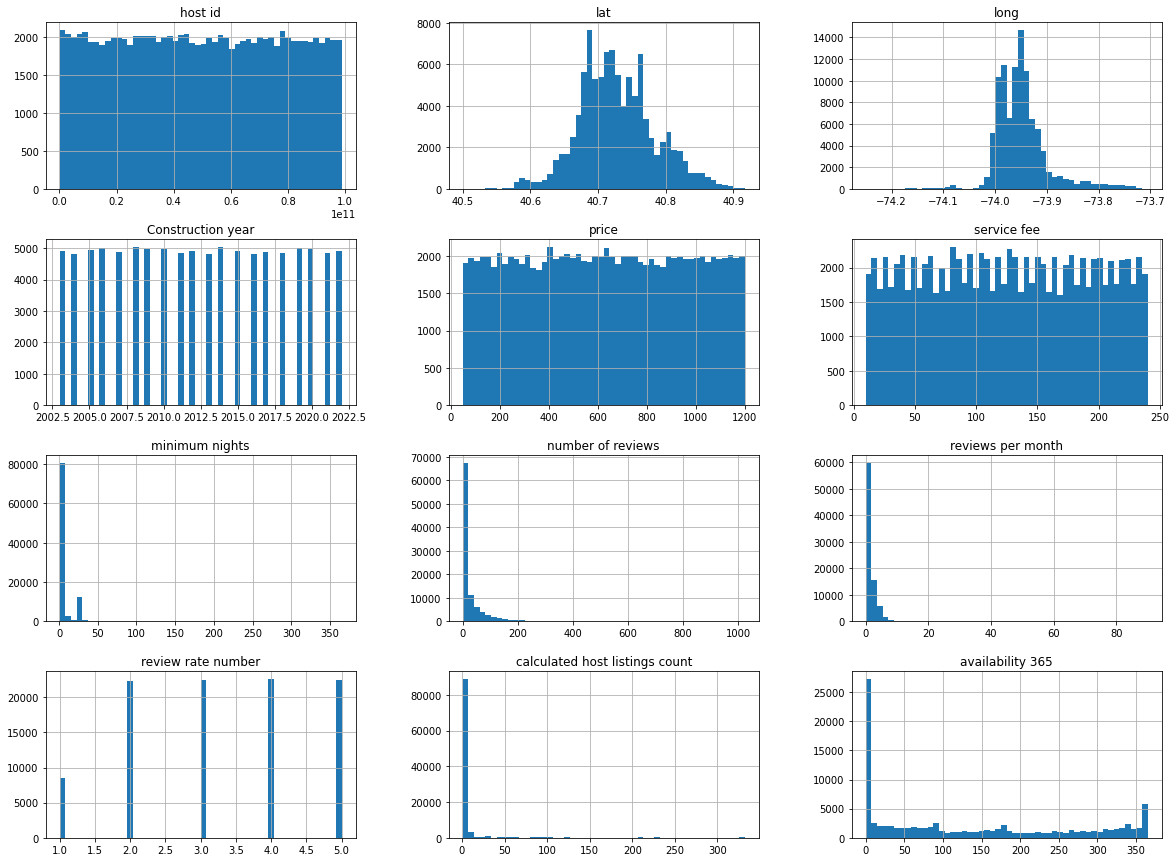

In [128]:
# To plot a histogram for each numerical attribute
bnb_data.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

#- host id is pointless to show like this
#- This is also true for some of the data statistics in such as construction year's std and mean do not provide a lot of insight or meaning
#- Max availability is 3677 which cannot be true in a 365 day/year same can be said for minimum nights at >365 or <0(before removing those values in line 11)
#- an near-equal number of 2, 3, 4, 5 star reviews which is annoying
#- same with construction year

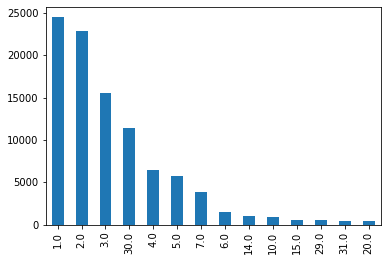

In [129]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?

# plotting the frequency of minimum required overnight stays per property
bnb_data['minimum nights'].value_counts()[:20]
bnb_data['minimum nights'].value_counts()[:20].plot.bar()

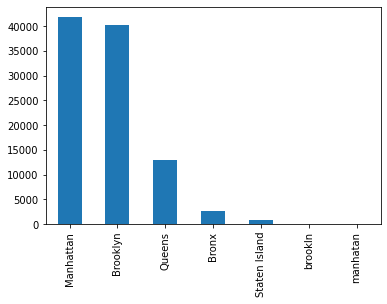

In [130]:
# plotting the frequency of property neighbourhoods
bnb_data['neighbourhood group'].value_counts()[:20]
bnb_data['neighbourhood group'].value_counts()[:20].plot.bar()

# those like 5 or so undercapitalised ones lol
# includes typos

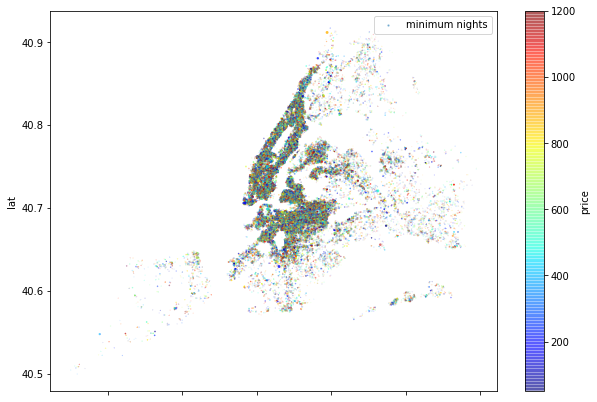

In [131]:
bnb_data.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    s=bnb_data["minimum nights"]/100, label="minimum nights", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
#EXAMPLE plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
#EXAMPLE The radius of each circle represents the district’s population(option s) and the color represents the price (option c).

# plots the price of a property against its longitude and latitude 


In [132]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = bnb_data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [133]:
corr_matrix["review rate number"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

review rate number                1.000000
reviews per month                 0.035687
calculated host listings count    0.023820
long                              0.014430
Construction year                 0.005072
host id                           0.004502
availability 365                  0.002991
minimum nights                    0.001930
lat                              -0.002937
service fee                      -0.006270
price                            -0.006421
number of reviews                -0.018840
Name: review rate number, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f3562ce90>,
      dtype=object)

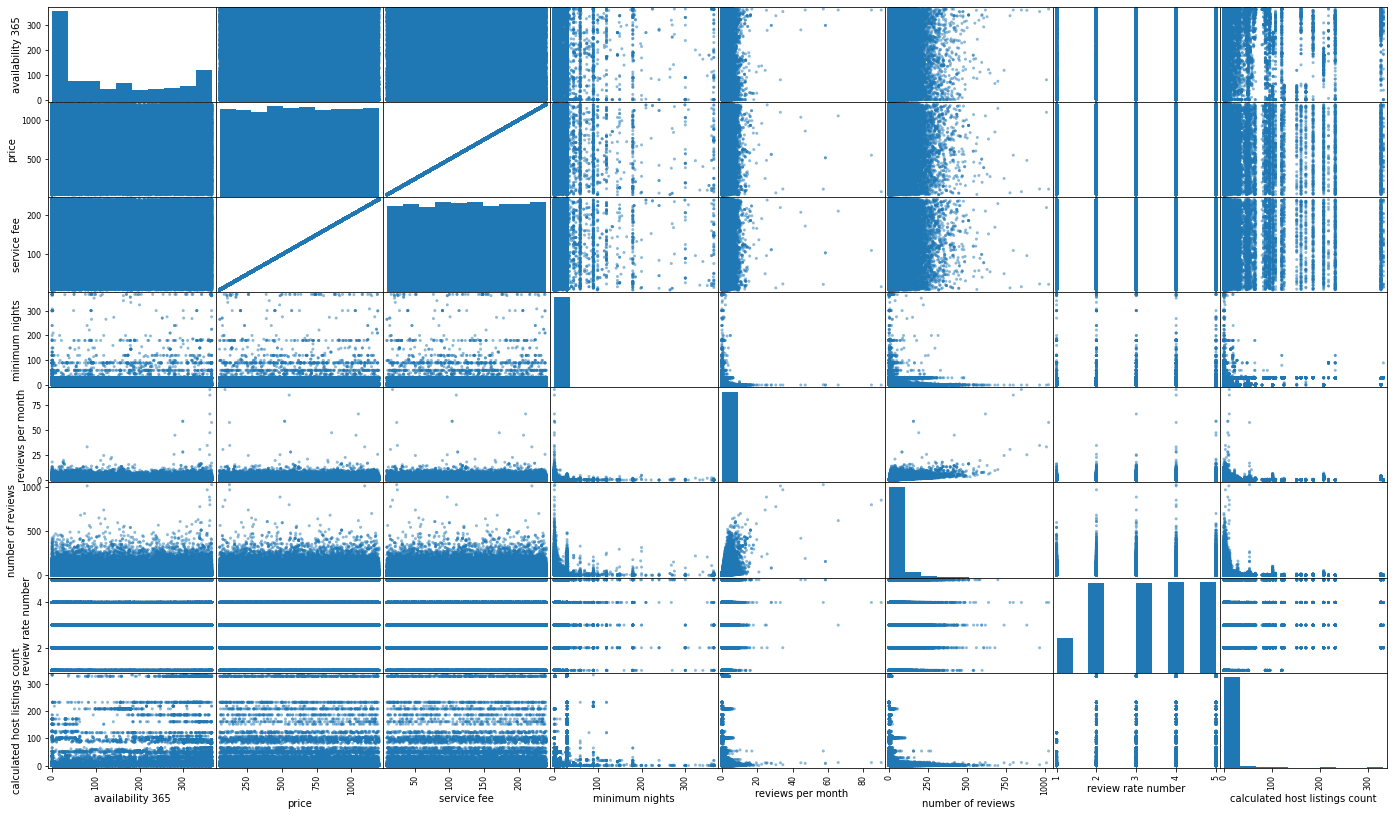

In [134]:
from pandas.plotting import scatter_matrix

attributes = ["availability 365","price", "service fee",'minimum nights',
              'reviews per month','number of reviews',
              'review rate number','calculated host listings count']
scatter_matrix(bnb_data[attributes], figsize=(24, 14))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(0.0, 1250.0, 0.0, 275.0)

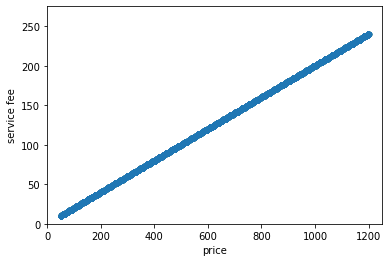

In [135]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
bnb_data.plot(kind="scatter", x="price", y="service fee",
             alpha=0.1)
plt.axis([0, 1250, 0, 275])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?


#theres a direct correlation between a bnb's price and its service fee
#bnb's price may include the service fee as a sum

# Experimenting with Attribute Combinations

In [136]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

bnb_data["minimum stay cost per night"] = bnb_data["price"]/bnb_data["minimum nights"]
#others are from the example

#bnb_data["bedrooms_per_room"] = bnb_data["total_bedrooms"]/bnb_data["total_rooms"]
#bnb_data["population_per_household"]=bnb_data["population"]/bnb_data["households"]

In [137]:
corr_matrix = bnb_data.corr()
corr_matrix["minimum stay cost per night"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

minimum stay cost per night       1.000000
service fee                       0.530539
price                             0.530238
reviews per month                 0.244448
number of reviews                 0.112453
long                              0.094848
Construction year                 0.004320
host id                           0.001798
review rate number               -0.005006
lat                              -0.010285
availability 365                 -0.012275
calculated host listings count   -0.099770
minimum nights                   -0.335082
Name: minimum stay cost per night, dtype: float64

In [138]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the housing describe method to view the statistical summary of the dataset 

In [139]:
# y = bnb_data["price"]
# y = y.dropna(how='any',axis=0)
X = bnb_data.drop(columns=["NAME", "host id", "host_identity_verified", "host name", "neighbourhood group", "neighbourhood", "country", "country code", "instant_bookable", "cancellation_policy", "room type", "last review", "house_rules", "license"])
X = X.dropna(how='any',axis=0)
y = X["price"]
X = X.drop(columns=["price", "minimum stay cost per night"])
X.describe()

,lat,long,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000,82527.000000
mean,40.727295,-73.948229,2012.489973,125.317060,7.240539,31.889188,1.389183,3.289311,7.112412,135.564300
std,0.056432,0.050686,5.761925,66.334447,15.163892,51.434372,1.756640,1.276700,29.759679,128.391135
min,40.504560,-74.249840,2003.000000,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000
25%,40.687640,-73.982065,2007.000000,68.000000,2.000000,3.000000,0.230000,2.000000,1.000000,5.000000
50%,40.721270,-73.953570,2012.000000,125.000000,3.000000,11.000000,0.760000,3.000000,1.000000,94.000000
75%,40.762550,-73.930460,2017.000000,183.000000,5.000000,38.000000,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,2022.000000,240.000000,365.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


In [140]:
X_train, X_test, y_train, y_test = X[:40000], X[40000:], y[:40000], y[40000:]

In [141]:
y_train_above_mean = (y_train > 626.110441)
y_test_above_mean = (y_test > 626.110441)

In [142]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_above_mean)

SGDClassifier(random_state=42)

In [143]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_above_mean, cv=3)

<img src="https://miro.medium.com/max/1051/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" style="width: 400px;"/>

In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_above_mean, y_train_pred)

array([[19752,   302],
       [  135, 19811]])

In [145]:
y_train_perfect_predictions = y_train_above_mean  # pretend we reached perfection
confusion_matrix(y_train_above_mean, y_train_perfect_predictions)

array([[20054,     0],
       [    0, 19946]])

In [146]:
from sklearn.metrics import precision_score, recall_score

# Precision is the number of correctly classified positive examples divided by the total number of examples that are classified as positive. 
precision_score(y_train_above_mean, y_train_pred)

0.984984835678417

In [147]:
# Recall r is the number of correctly classified positive examples divided by the total number of actual positive examples in the test set. 
recall_score(y_train_above_mean, y_train_pred)

0.9932317256592801

In [148]:
from sklearn.metrics import f1_score
# f1 score (or f-measure) combines the recall and precision, the higher the better the model
f1_score(y_train_above_mean, y_train_pred)

0.9890910906413042

In [149]:
y_scores = sgd_clf.decision_function(X_train.iloc[[1]])
y_scores

array([-238988.41308634])

In [150]:
threshold = 0
y_some_row_pred = (y_scores > threshold)

In [151]:
y_some_row_pred

array([False])

In [152]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [153]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_above_mean, cv=3,
                             method="decision_function")

In [154]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_above_mean, y_scores)

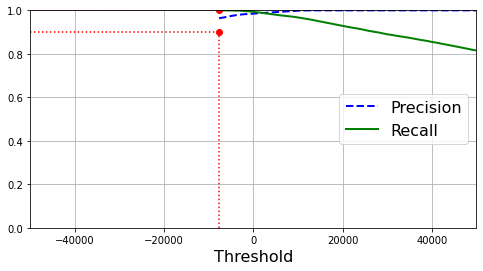

In [155]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

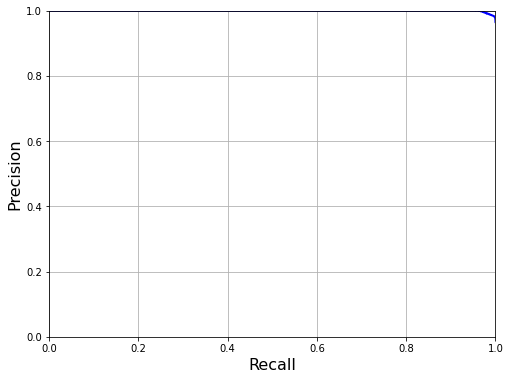

In [156]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
# plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
# plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
# plt.plot([0.4368], [0.9], "ro")
plt.show()

In [157]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_above_mean, y_scores)

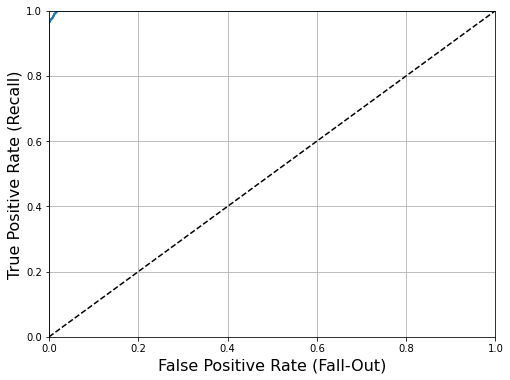

In [158]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
# plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
# plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
# plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [159]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_above_mean, y_scores)

0.9996617675342853

In [160]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_above_mean, cv=3, scoring="accuracy")

array([0.99332533, 0.97734943, 0.99654991])

In [165]:
from sklearn.model_selection import train_test_split

X = bnb_data.drop(columns=["NAME", "host id", "host_identity_verified", "host name", "neighbourhood group", "neighbourhood", "country", "country code", "instant_bookable", "cancellation_policy", "room type", "last review", "house_rules", "license"])
X = X.dropna(how='any',axis=0)


x_trainTTS, x_testTTS, y_trainTTS, y_testTTS = train_test_split(X, y, test_size=0.2)

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

 
sgd_clf.fit(x_trainTTS, y_trainTTS)

score = sgd_clf.score(x_trainTTS, y_trainTTS)
print("Training score: ", score) 


KeyboardInterrupt: ignored

# Pipeline stuff

In [ ]:
bnb_data.describe()

In [ ]:
np.random.seed(42)

In [ ]:
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio) 
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(bnb_data, 0.2)
len(train_set)

In [ ]:
len(test_set)

In [ ]:
bnb_num = bnb_data.drop(['NAME', 'host id', "host_identity_verified", "host name", "neighbourhood group", "neighbourhood", "country", "country code", "instant_bookable", "cancellation_policy", "room type", "last review", "house_rules", "license"], axis=1)
bnb_num.head()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # Dealing with missing values
    #('attribs_adder', CombinedAttributesAdder()), # New attribute
    ('std_scaler', StandardScaler()),            # Attribute normalization
])

bnb_num_tr = num_pipeline.fit_transform(bnb_num)
bnb_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(bnb_num)
cat_attribs = ['NAME', 'host id', "host_identity_verified", "host name", "neighbourhood group", "neighbourhood", "country", "country code", "cancellation_policy", "room type", "house_rules", "license"]
#cat_attribs = ['country', 'NAME']
bnb_data['country']=bnb_data['country'].fillna('United States')
bnb_data['NAME']=bnb_data['NAME'].fillna('unspecified')
bnb_data['host id']=bnb_data['host id'].fillna('unspecified')
bnb_data['host_identity_verified']=bnb_data['host_identity_verified'].fillna('unspecified')
bnb_data['host name']=bnb_data['host name'].fillna('unspecified')
bnb_data['neighbourhood group']=bnb_data['neighbourhood group'].fillna('unspecified')
bnb_data['neighbourhood']=bnb_data['neighbourhood'].fillna('unspecified')
bnb_data['country code']=bnb_data['country code'].fillna('USA')
bnb_data['instant_bookable']=bnb_data['instant_bookable'].fillna('unspecified') #need to change to 0 1 system, then add back into data being pipelined
bnb_data['room type']=bnb_data['room type'].fillna('unspecified') #need to change to numerical system
bnb_data['license']=bnb_data['license'].fillna('unspecified')
bnb_data['cancellation_policy']=bnb_data['cancellation_policy'].fillna('unspecified') #need to change to numerical system
bnb_data['house_rules']=bnb_data['house_rules'].fillna('unspecified')


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

bnb_prepped = full_pipeline.fit_transform(bnb_data)
bnb_prepped